# How to Implement Machine Learning Algorithm with scikit-learn
This notebook includes 
- how to prepare dataset (iris and MNIST)
- how to implement machine learning algorithm (decision tree and random forest)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Iris Dataset
Iris dataset has 150 instances (50 in each of three classes), where each class refers to a type of iris plant. see https://scikit-learn.org/stable/datasets/index.html#iris-plants-dataset for more details.
Load iris dataset and make a scatter plot with respect to arbitrary features.

In [2]:
def build_dataset(dtype, visualize=False):
    if dtype == 'iris':
        from sklearn.model_selection import train_test_split
        from sklearn.datasets import load_iris
        iris = load_iris()
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
        
        if visualize:
            import pandas as pd
            iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
            #pd.plotting.scatter_matrix(iris_df, c=y_train, s=60, alpha=0.8)
            def target2color(target):
                color = ['r', 'g', 'b'] # setosa, versicolor, virginica
                return color[target]
            col = list(map(target2color, y_train))
            iris_df.plot.scatter(x='petal length (cm)', y='petal width (cm)', c=col)
    else:
        raise NotImplementedError
    return X_train, y_train, X_test, y_test

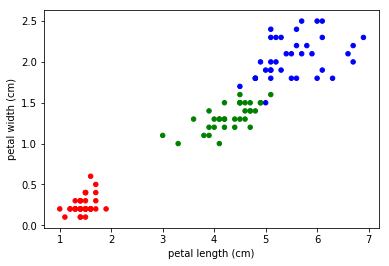

In [3]:
_ = build_dataset('iris', visualize=True)

## 2. Decision Tree
Use DecisionTreeClassifier from sklearn package to load decision tree algorithm. See https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart and https://medium.com/datadriveninvestor/decision-tree-algorithm-with-hands-on-example-e6c2afb40d38 for more details.

In [4]:
def build_model(mtype):
    if mtype == 'tree':
        from sklearn.tree import DecisionTreeClassifier
        clf = DecisionTreeClassifier()
    else:
        raise NotImplementedError
    return clf

## 3. Decision Tree for Iris: Main Procedure
Call model.fit()/model.score() to train/evaluate after dataset and model preparation. 
Decision rules from trained DecisionTreeClassifier can be visualized using plot_tree() function. 
Verify the result using the scatter plot above.

In [5]:
def istrue(dic, attr):
    return attr in dic and dic[attr]

def train_sklearn(config={}):
    X_train, y_train, X_test, y_test = build_dataset(config['dataset'])
    clf = build_model(config['model'])
    #print(clf)
    clf.fit(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    #prediction = clf.predict(X_test)
    #test_acc = (prediction == y_test).mean()
    print('test accuracy: {}'.format(test_acc))
    
    if istrue(config, 'visualize'):
        assert config['model'] is 'tree'
        from sklearn.tree import plot_tree
        fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
        fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
        cn=['setosa', 'versicolor', 'virginica']
        plot_tree(clf,
            feature_names = fn, 
            class_names = cn,
            filled = True)

test accuracy: 0.9736842105263158
CPU times: user 140 ms, sys: 24 ms, total: 164 ms
Wall time: 160 ms


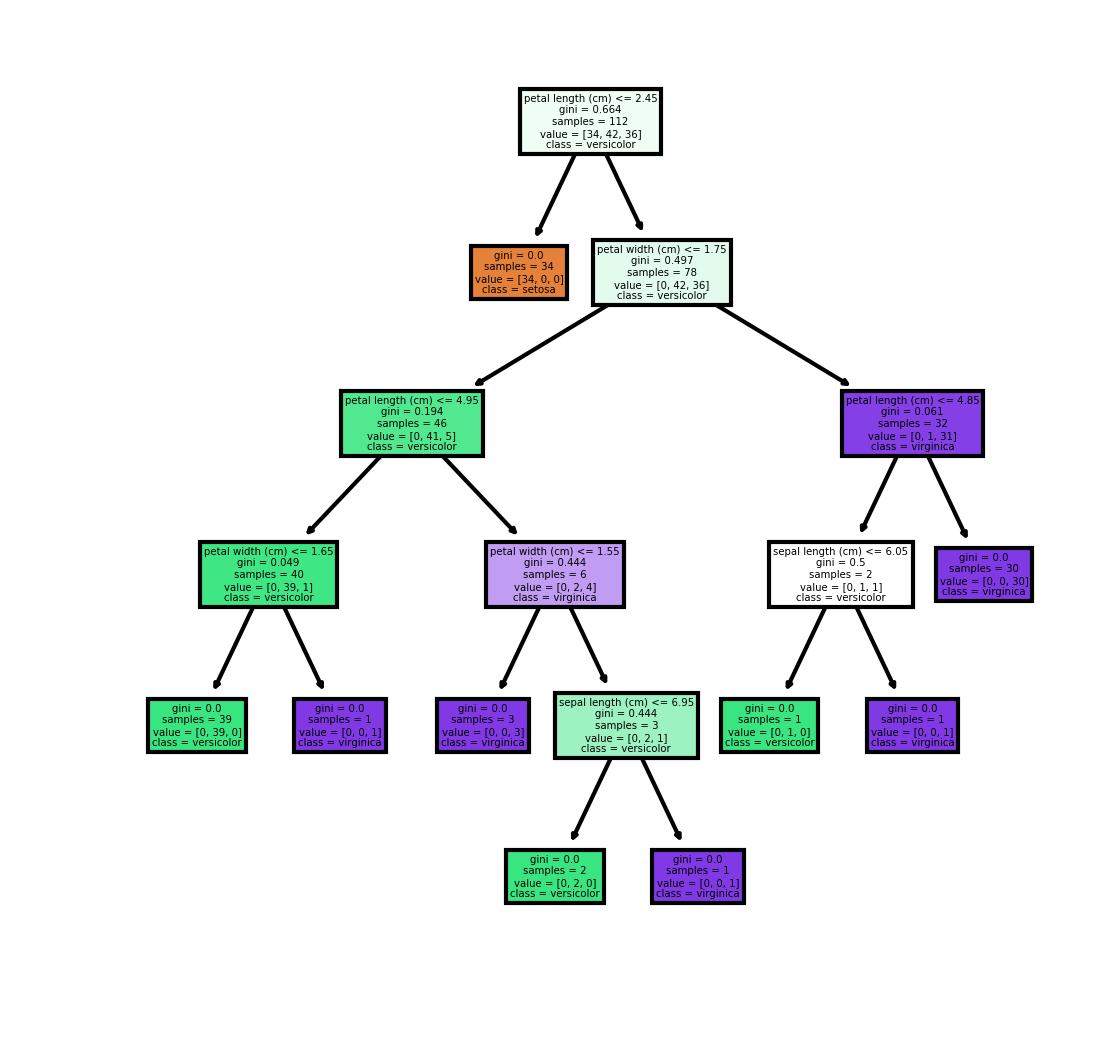

In [6]:
%%time
train_sklearn({'dataset': 'iris', 'model': 'tree', 'visualize': True})

## 4. More Complex Dataset: MNIST
MNIST dataset has a training/test set of 60,000/10,000 handwritten digit examples.
see more details in http://yann.lecun.com/exdb/mnist/.
Add procedure for MNIST dataset and visualize single example with class label.

In [7]:
def build_dataset(dtype, visualize=False):
    if dtype == 'iris':
        from sklearn.model_selection import train_test_split
        from sklearn.datasets import load_iris
        iris = load_iris()
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
        
        if visualize:
            import pandas as pd
            iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
            #pd.plotting.scatter_matrix(iris_df, c=y_train, s=60, alpha=0.8)
            def target2color(target):
                color = ['r', 'g', 'b'] # setosa, versicolor, virginica
                return color[target]
            col = list(map(target2color, y_train))
            iris_df.plot.scatter(x='petal length (cm)', y='petal width (cm)', c=col)
    elif dtype == 'mnist':
        from sklearn.datasets import fetch_openml
        
        mnist = fetch_openml('mnist_784')
        n_train = 60000
        X_train, X_test = mnist.data[:n_train], mnist.data[n_train:]
        y_train, y_test = mnist.target[:n_train], mnist.target[n_train:]
        
        if visualize:
            id = 0
            plt.figure()
            plt.imshow(X_train[id].reshape(28, 28))
            plt.title('class {}'.format(y_train[id]))
    else:
        raise NotImplementedError
    return X_train, y_train, X_test, y_test

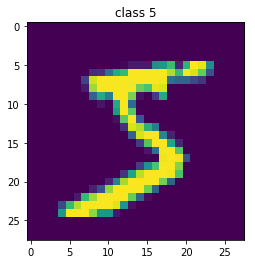

In [8]:
_ = build_dataset('mnist', visualize=True)

## 5. Decision Tree for MNIST
We get result under 90% accuracy. Let's go further.


In [9]:
%%time
train_sklearn({'dataset': 'mnist', 'model': 'tree'})

test accuracy: 0.88
CPU times: user 32.6 s, sys: 416 ms, total: 33 s
Wall time: 33 s


## 6. Random Forest for MNIST
Use RandomForestClassifier from sklearn package to load random forest algorithm and check the result.


In [10]:
def build_model(mtype):
    if mtype == 'tree':
        from sklearn.tree import DecisionTreeClassifier
        clf = DecisionTreeClassifier()
    elif mtype == 'forest':
        from sklearn.ensemble import RandomForestClassifier
        clf = RandomForestClassifier()
    else:
        raise NotImplementedError
    return clf

In [11]:
%%time
train_sklearn({'dataset': 'mnist', 'model': 'forest'})

test accuracy: 0.9685
CPU times: user 51.6 s, sys: 436 ms, total: 52 s
Wall time: 52 s
